## __Airplane Price Prediction__

The primary goal of this model is to develop the most accurate prediction model for airplane prices based on available data. We will leverage fundamental principles of supervised machine learning, including cross-validation, ordinary linear regression, and regularized models such as Lasso, Ridge, and Elastic Net.

##### __Data Preparation and Exploration__
We begin by preparing the dataset through data cleaning, ensuring that it is free from inconsistencies and missing values. Following this, we conduct exploratory data analysis (EDA) to understand relationships between variables using visualizations and statistical measures.

##### __Model Development__
We will follow a structured approach to building and evaluating predictive models for price estimation. Our modeling process will progress from simpler models to more complex ones, ensuring a thorough assessment of performance at each stage.

We begin with a basic __linear regression model__, trained on the training set and evaluated on the test set. To further validate the reliability of performance metrics such as R² and Mean Squared Error (MSE), we will apply __cross-validation__.

Next, we will enhance the linear regression model by incorporating __polynomial features__ (up to the second degree) and __standardizing__ feature variables, followed by another round of cross-validation.

Moving forward, we introduce __regularized regression models__: Lasso, Ridge, and Elastic Net. We will determine the optimal parameters for these models and compare their performance against the previous models, again validating the results using cross-validation.

Finally, we will conduct a __grid search__ for Lasso and Ridge regression, incorporating polynomial features up to the third degree, to identify the best-performing model for predicting prices based on the given data.

##### __Results and Model Selection__
We conclude by comparing the results of all models, selecting the best-performing one based on evaluation metrics.

The dataset is sourced from Kaggle, so we begin by installing kagglehub to access the data efficiently.

In [6]:
pip install kagglehub


  Obtaining dependency information for kagglehub from https://files.pythonhosted.org/packages/96/52/97d3269c429d9215e52c2a7766219c5ad8d53fbb39858c17687874a2524b/kagglehub-0.3.7-py3-none-any.whl.metadata
  Using cached kagglehub-0.3.7-py3-none-any.whl.metadata (30 kB)
  Obtaining dependency information for model-signing from https://files.pythonhosted.org/packages/13/86/11fec1355e8f650d647162090b6f113d03493f7b15e65da91635c714fcab/model_signing-0.2.0-py3-none-any.whl.metadata
  Using cached model_signing-0.2.0-py3-none-any.whl.metadata (26 kB)
  Obtaining dependency information for sigstore from https://files.pythonhosted.org/packages/70/f5/324edb6a802438e97e289992a41f81bb7a58a1cda2e49439e7e48896649e/sigstore-3.6.1-py3-none-any.whl.metadata
  Using cached sigstore-3.6.1-py3-none-any.whl.metadata (15 kB)
  Obtaining dependency information for rfc3161-client~=0.1.2 from https://files.pythonhosted.org/packages/6e/76/2da3bc24122def498d2717c64065bdb40f9e5401cb11032a5736777a8148/rfc3161_client

In [611]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("asinow/airplane-price-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\jelen\.cache\kagglehub\datasets\asinow\airplane-price-dataset\versions\1


In [612]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

####  LOADING DATASET AND UNDERSTANDING VARIABLES

In [613]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [614]:
import pandas as pd

data =pd.read_csv("C:/Users/jelen/.cache/kagglehub/datasets/asinow/airplane-price-dataset/versions/1/airplane_price_dataset.csv")

In [615]:
pd.set_option('display.max_columns', 30)
data

,Model,Üretim Yılı,Motor Sayısı,Motor Türü,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Satış Bölgesi,Fiyat ($)
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.360000,2185.430000,36,Asya,12857083.910000
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.030000,1202.080000,26,Avrupa,13914058.550000
2,Airbus A320,1988,2,Turbofan,180,6300,13.260000,761.380000,35,Avustralya,90735695.860000
3,Boeing 737,2023,2,Turbofan,162,5700,14.610000,592.630000,0,Avustralya,136659689.370000
4,Cessna 172,1985,1,Piston,4,1285,18.490000,4245.990000,38,Güney Amerika,203798.100000
...,...,...,...,...,...,...,...,...,...,...,...
12372,Boeing 777,1994,2,Turbofan,396,15600,12.160000,3054.290000,29,Avrupa,389807070.360000
12373,Bombardier CRJ200,2005,2,Turbofan,50,3000,8.260000,3107.670000,18,Afrika,15938876.070000
12374,Boeing 737,2015,2,Turbofan,162,5700,6.930000,3972.160000,8,Kuzey Amerika,98709939.200000
12375,Cessna 172,2013,1,Piston,4,1285,14.280000,999.840000,10,Afrika,396520.670000


In [616]:
#first let's translate turkish names to english

data.columns = ['Model', 'Production year', 'Number of engines', 'Engine type', 'Capacity', 'Range', 'Fuel Consumption', 'Hourly Maintenance Cost', 'Age', 'Sales Region', 'Price']

In [617]:
data['Sales Region'].unique()

array(['Asya', 'Avrupa', 'Avustralya', 'Güney Amerika', 'Afrika',
       'Kuzey Amerika'], dtype=object)

In [618]:
data['Sales Region'].replace({'Asya':'Asia', 'Avrupa':'Europe', 'Avustralya':'Australia', 'Güney Amerika':'South America', 'Afrika':'Africa', 'Kuzey Amerika':'North America'}, inplace = True)

Meaning of each variable is presented below:

1. **Model**: The airplane model (e.g., Boeing 737, Airbus A320). Represents a key feature influencing price based on brand and performance capabilities.
2. **Production Year**: The year the airplane was manufactured. It helps calculate the airplane's age, a significant factor in depreciation.
3. **Number of Engines**: The total number of engines on the airplane (1 for piston engines, 2 for others).
4. **Engine Type**: Type of engine, such as Turbofan or Piston. Different engine types affect performance, fuel efficiency, and price.
5. **Capacity**: Passenger capacity of the airplane. Larger airplanes with higher capacity tend to have higher base prices.
6. **Range (in km)**: Maximum range the airplane can travel without refueling. Greater range increases operational flexibility and cost.
7. **Fuel Consumption (in L/hour)**: Average fuel consumption of the airplane. Turbofan engines consume less than piston engines, influencing operating costs.
8. **Hourly Maintenance Cost (in $)**: The average hourly maintenance cost in USD. Higher maintenance costs can lower demand and impact pricing.
9. **Age**: The age of the airplane, calculated as 2023 - Production Year. Older airplanes tend to have lower prices due to depreciation.
10. **Sales Region**: The region where the airplane is being sold (e.g., Asia, Europe, North America). Regional demand and currency variations can affect prices.
11. **Price (in USD)**: The final price of the airplane, serving as the target variable for prediction.

#### DATA CLEANING

In [619]:
#missing values and data types?

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12377 entries, 0 to 12376
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    12377 non-null  object 
 1   Production year          12377 non-null  int64  
 2   Number of engines        12377 non-null  int64  
 3   Engine type              12377 non-null  object 
 4   Capacity                 12377 non-null  int64  
 5   Range                    12377 non-null  int64  
 6   Fuel Consumption         12377 non-null  float64
 7   Hourly Maintenance Cost  12377 non-null  float64
 8   Age                      12377 non-null  int64  
 9   Sales Region             12377 non-null  object 
 10  Price                    12377 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ MB


There are no missing values

In [620]:
data.nunique()

Model                          6
Production year               44
Number of engines              2
Engine type                    2
Capacity                       6
Range                          6
Fuel Consumption            2704
Hourly Maintenance Cost    12218
Age                           44
Sales Region                   6
Price                      12376
dtype: int64

There are four categorical variables: Model, Number of Engines, Engine Type, and Sales Region. 
While the remaining variables are numerical, not all of them are continuous: Capacity and Range have only six distinct values in the dataset and Number of Engines is a binary variable (with only two possible values: 1 and 2).

Production Year, Fuel Consumption, Hourly Maintenance Cost, Age, and Price are continuous variables.

Additionally, there are no missing values in the entire dataset. 

In [621]:
#categorical variables - are there any typos?

for col in data.select_dtypes('object').columns:
    print(f'{col}: {data[col].unique()}')

Model: ['Bombardier CRJ200' 'Airbus A320' 'Boeing 737' 'Cessna 172' 'Airbus A350'
 'Boeing 777']
Engine type: ['Turbofan' 'Piston']
Sales Region: ['Asia' 'Europe' 'Australia' 'South America' 'Africa' 'North America']


No typos.

In [622]:
#duplicates?

display(data[data.duplicated(keep=False)])

,Model,Production year,Number of engines,Engine type,Capacity,Range,Fuel Consumption,Hourly Maintenance Cost,Age,Sales Region,Price


No duplicates.

It is important to notice that variables **Age** and **Production Year** have a **deterministic linear relationship** (Age = 2023 - Production Year), so we will remove Production Year as it does not provide additional information. Keeping both in the dataset would introduce strong multicollinearity, which could negatively impact the model by making coefficient estimates unstable and less interpretable.

In [623]:
data.drop(columns = ['Production year'], inplace = True)
data

,Model,Number of engines,Engine type,Capacity,Range,Fuel Consumption,Hourly Maintenance Cost,Age,Sales Region,Price
0,Bombardier CRJ200,2,Turbofan,50,3000,14.360000,2185.430000,36,Asia,12857083.910000
1,Bombardier CRJ200,2,Turbofan,50,3000,4.030000,1202.080000,26,Europe,13914058.550000
2,Airbus A320,2,Turbofan,180,6300,13.260000,761.380000,35,Australia,90735695.860000
3,Boeing 737,2,Turbofan,162,5700,14.610000,592.630000,0,Australia,136659689.370000
4,Cessna 172,1,Piston,4,1285,18.490000,4245.990000,38,South America,203798.100000
...,...,...,...,...,...,...,...,...,...,...
12372,Boeing 777,2,Turbofan,396,15600,12.160000,3054.290000,29,Europe,389807070.360000
12373,Bombardier CRJ200,2,Turbofan,50,3000,8.260000,3107.670000,18,Africa,15938876.070000
12374,Boeing 737,2,Turbofan,162,5700,6.930000,3972.160000,8,North America,98709939.200000
12375,Cessna 172,1,Piston,4,1285,14.280000,999.840000,10,Africa,396520.670000


Feature Fuel Consumption has outliers
Feature Hourly Maintenance Cost doesn't have outliers
Feature Age doesn't have outliers


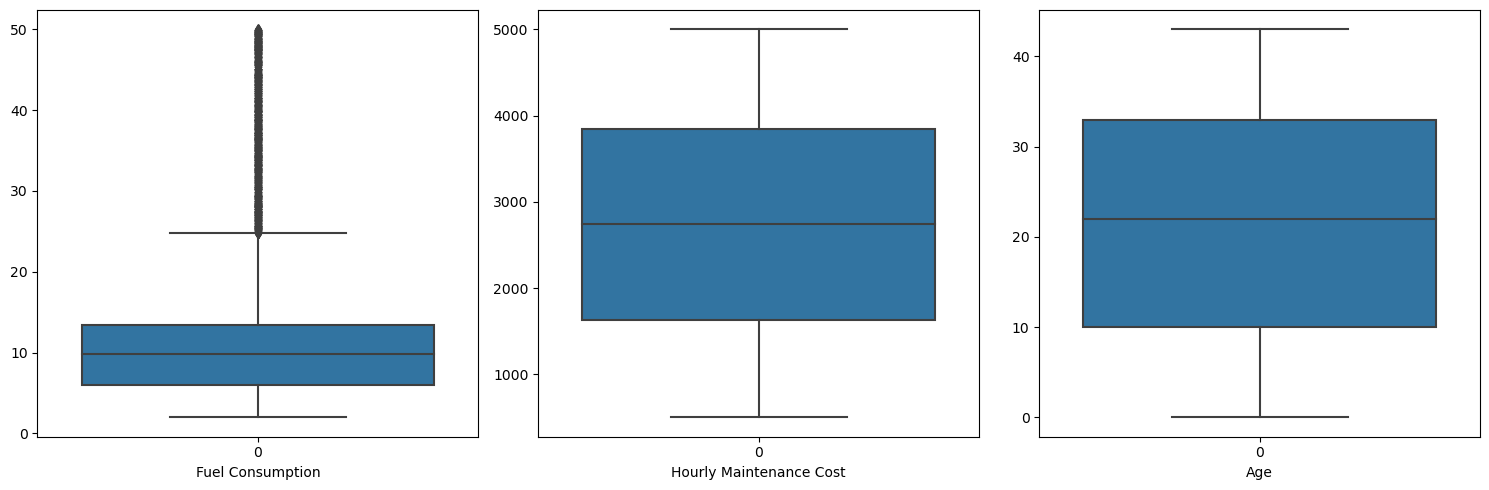

In [624]:
#outliers? 

num_cols = ['Fuel Consumption', 'Hourly Maintenance Cost', 'Age']

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize =(15,5))

for i,col in enumerate(num_cols):
    sns.boxplot(data[col],ax = ax[i])
    ax[i].set_xlabel(col)

    #does it have outliers?
    iqr = np.percentile(data[col], q = 75)-np.percentile(data[col], q = 25)
    upper_limit = np.percentile(data[col], q = 75) + 1.5*iqr
    lower_limit = np.percentile(data[col], q = 25) - 1.5*iqr

    if len(data.loc[(data[col]>upper_limit) | (data[col]<lower_limit), col])>0:
        print(f'Feature {col} has outliers')
    else:
        print(f"Feature {col} doesn't have outliers")


plt.tight_layout()
plt.show()

In [625]:
from scipy.stats import stats

data.loc[abs(stats.zscore(data['Fuel Consumption']))>3, 'Fuel Consumption']

19      49.480000
71      48.160000
77      49.600000
118     47.230000
120     46.100000
           ...   
12186   48.550000
12221   48.330000
12247   46.970000
12258   47.970000
12368   43.080000
Name: Fuel Consumption, Length: 422, dtype: float64

The variable **Fuel Consumption** has too many outliers, so we will not remove them. Instead, we'll consider transforming them to reduce the impact of extreme values.
If a variable has a large number of outliers, removing too much data can lead to information loss, which may reduce the model's ability to generalize.
We will also use models that handle outliers better, such as Lasso and Ridge Regression, so the outliers will not significantly affect the results.

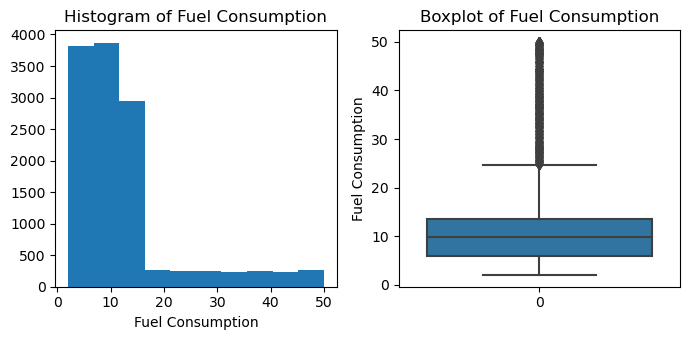

In [626]:
#Fuel Consumption analysis

fig, ax = plt.subplots(ncols =2, figsize = (7,3.5))
ax[0].hist(data['Fuel Consumption'])
ax[0].set_xlabel('Fuel Consumption')
ax[0].set_title('Histogram of Fuel Consumption')

sns.boxplot(data['Fuel Consumption'], ax = ax[1])
ax[1].set_ylabel('Fuel Consumption')
ax[1].set_title('Boxplot of Fuel Consumption')
plt.tight_layout()
plt.show()

Data is very right skewed so it is reasonable to apply log-transformation.

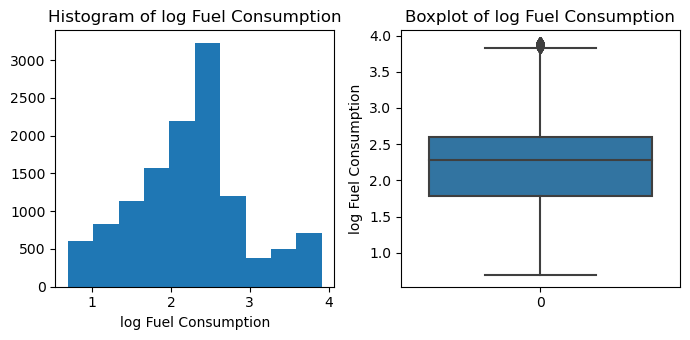

In [627]:
fig, ax = plt.subplots(ncols =2, figsize = (7,3.5))
ax[0].hist(np.log(data['Fuel Consumption']))
ax[0].set_xlabel('log Fuel Consumption')
ax[0].set_title('Histogram of log Fuel Consumption')

sns.boxplot(np.log(data['Fuel Consumption']), ax = ax[1])
ax[1].set_ylabel('log Fuel Consumption')
ax[1].set_title('Boxplot of log Fuel Consumption')
plt.tight_layout()
plt.show()

The log transformation improved the distribution, making it closer to normal. Therefore, instead of using the variable **Fuel Consumption**, we will use **log_Fuel Consumption** moving forward.

In [628]:
data['log Fuel Consumption'] = np.log(data['Fuel Consumption'])
data.drop(columns = 'Fuel Consumption', inplace = True)
data

,Model,Number of engines,Engine type,Capacity,Range,Hourly Maintenance Cost,Age,Sales Region,Price,log Fuel Consumption
0,Bombardier CRJ200,2,Turbofan,50,3000,2185.430000,36,Asia,12857083.910000,2.664447
1,Bombardier CRJ200,2,Turbofan,50,3000,1202.080000,26,Europe,13914058.550000,1.393766
2,Airbus A320,2,Turbofan,180,6300,761.380000,35,Australia,90735695.860000,2.584752
3,Boeing 737,2,Turbofan,162,5700,592.630000,0,Australia,136659689.370000,2.681706
4,Cessna 172,1,Piston,4,1285,4245.990000,38,South America,203798.100000,2.917230
...,...,...,...,...,...,...,...,...,...,...
12372,Boeing 777,2,Turbofan,396,15600,3054.290000,29,Europe,389807070.360000,2.498152
12373,Bombardier CRJ200,2,Turbofan,50,3000,3107.670000,18,Africa,15938876.070000,2.111425
12374,Boeing 737,2,Turbofan,162,5700,3972.160000,8,North America,98709939.200000,1.935860
12375,Cessna 172,1,Piston,4,1285,999.840000,10,Africa,396520.670000,2.658860


#### EXPLORATORY DATA ANALYSIS

In [629]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12377 entries, 0 to 12376
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    12377 non-null  object 
 1   Number of engines        12377 non-null  int64  
 2   Engine type              12377 non-null  object 
 3   Capacity                 12377 non-null  int64  
 4   Range                    12377 non-null  int64  
 5   Hourly Maintenance Cost  12377 non-null  float64
 6   Age                      12377 non-null  int64  
 7   Sales Region             12377 non-null  object 
 8   Price                    12377 non-null  float64
 9   log Fuel Consumption     12377 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 967.1+ KB


To start, we will analyze whether there is a relationship between the target variable and the feature variables.To start, we will analyze whether there is a relationship between the target variable and the feature variables.

 - For categorical variables, we will achieve this by using boxplots to visualize the distribution of the target variable across different categories of these feature variables.

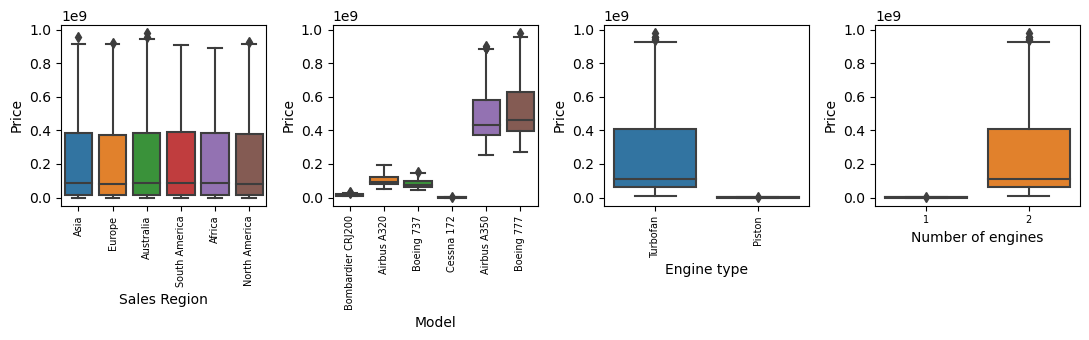

In [630]:
#boxplots of prices by model, engine type and sales regions
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (11,3.5))

sns.boxplot(x = 'Sales Region', y = 'Price', data = data, ax = ax[0])
sns.boxplot(x = 'Model', y = 'Price', data = data, ax = ax[1])
sns.boxplot(x = 'Engine type', y = 'Price', data = data, ax = ax[2])
sns.boxplot(x = 'Number of engines', y = 'Price', data = data, ax = ax[3])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, fontsize=7)  
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, fontsize=7)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90, fontsize = 7)
ax[3].set_xticklabels(ax[3].get_xticklabels(), fontsize = 7)

plt.tight_layout()
plt.show()

It appears that **Sales Region** has almost no impact on airplane prices, meaning the prices are fairly evenly distributed across different regions. 

On the other hand, different models show significant price differences, with models like the **Airbus A350** and **Boeing 777** having the highest prices, while the **Bombardier CRJ200** has the lowest. 

Additionally, planes with **Turbofan engines** tend to have much higher prices compared to those with Piston engines, while planes with 2 engines are much more expensive than planes with only 1 engine.

For numerical variables with a limited number of values (Capacity and Range) we will also visualize the distribution of the target variable using boxplots.




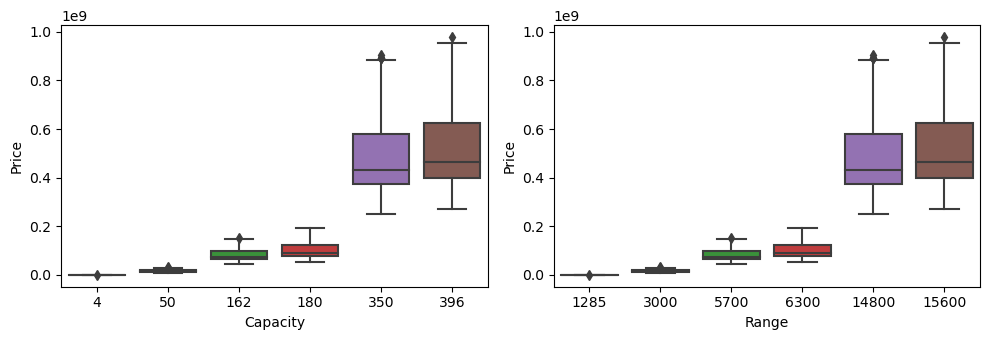

In [631]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,3.5))

ordinal_cols = ['Capacity', 'Range']

sns.boxplot(x = 'Capacity', y = 'Price', data = data, ax = ax[0])
sns.boxplot(x = 'Range', y = 'Price', data = data, ax = ax[1])


plt.tight_layout()
plt.show()

It seems that there is a **positive correlation** between Capacity and Price, as well as between Range and Price.

However, it also appears that the distribution of prices is fairly evenly spread when looking at the boxplots by the values of the feature variables, from lowest to highest. This suggests that these feature variables might be highly correlated, which could be problematic.


In [632]:
correlation = data['Capacity'].corr(data['Range'])
print(correlation)

0.9895093100905012


As we suspected, these two **features are highly correlated**, so it would be best to remove one of them. We will **remove Range**.

In [633]:
data.drop(columns = 'Range', inplace = True)

Now, let's look at the scatterplots of numerical feature variables and target variable.

Index(['Model', 'Number of engines', 'Engine type', 'Capacity',
       'Hourly Maintenance Cost', 'Age', 'Sales Region', 'Price',
       'log Fuel Consumption'],
      dtype='object')
F


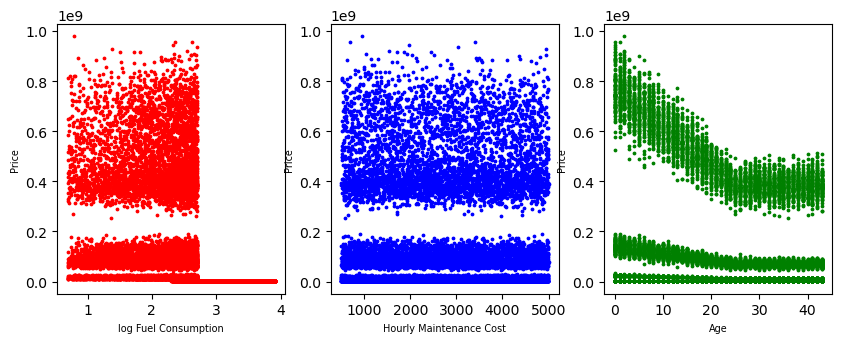

In [635]:
print(data.columns)

fig, ax = plt.subplots( nrows = 1, ncols = 3, figsize =(10,3.5))

continuous_cols = ['log Fuel Consumption', 'Hourly Maintenance Cost', 'Age']
colors =['red', 'blue', 'green']
print(col[0])
for i, col in enumerate(continuous_cols):
    ax[i].scatter(x = data[col], y = data['Price'], c = colors[i], s = 3 )
    ax[i].set_xlabel(col, fontsize = 7)
    ax[i].set_ylabel('Price', fontsize = 7)


From the scatterplots, it seems that there is **no clear relationship**, especially not a linear one, between these feature variables and the target variable. This could pose a problem for linear regression, as one of the core assumptions of linear regression is the existence of a linear relationship between the features and the target variable. However, in this case, Lasso regression could be a good choice, as it can effectively shrink the coefficients of irrelevant variables to zero, helping with feature selection even when the relationships are not strictly linear.

In [643]:
#correlation of feature variables and target variable 

num_cols = list(data.select_dtypes('number').columns)

pd.DataFrame(data[num_cols].corr().drop(index ='Price'))[['Price']]

,Price
Number of engines,0.385015
Capacity,0.896319
Hourly Maintenance Cost,-0.016033
Age,-0.197593
log Fuel Consumption,-0.260742


It seems that continuous variables are poorly correlated with target variable.

Now, we will check the assumptions of linear regression.

#### LINEAR REGRESSION ASSUMPTIONS

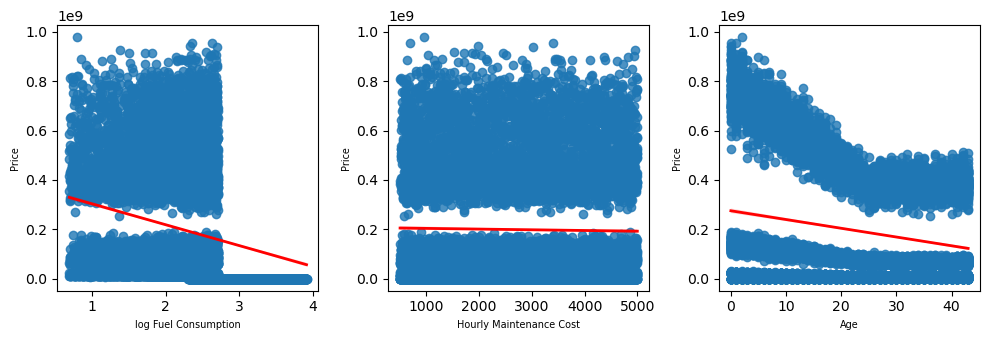

In [644]:
#linearity

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5)) 

continuous_cols = ['log Fuel Consumption', 'Hourly Maintenance Cost', 'Age']

for i, col in enumerate(continuous_cols):  
    sns.regplot(data=data, x=col, y='Price', ax=ax[i], line_kws={'color': 'red', 'linewidth': 2})  
    ax[i].set_xlabel(col, fontsize=7)
    ax[i].set_ylabel('Price', fontsize=7)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

As stated before, assumpiton of linear relationship is not satisfied, especially for Hourly Maintenence Cost. This can be a problem for a simple linear regression model, but we will try to address this issue through model regularization.

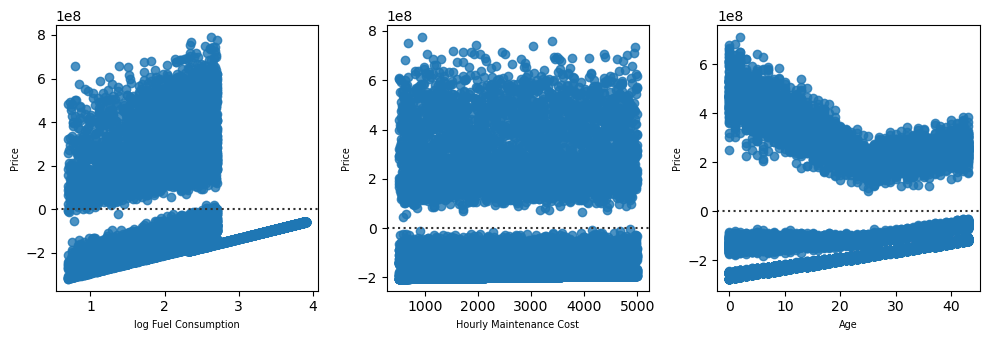

In [645]:
#homoscedasticity

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5)) 

continuous_cols = ['log Fuel Consumption', 'Hourly Maintenance Cost', 'Age']

for i, col in enumerate(continuous_cols):  
    sns.residplot(data=data, x=col, y='Price', ax=ax[i], line_kws={'color': 'red', 'linewidth': 2})  
    ax[i].set_xlabel(col, fontsize=7)
    ax[i].set_ylabel('Price', fontsize=7)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Homoscedasticity is also violated. We might be able to fix this by transforming the dependent variable. Let's first check if the dependent variable is somewhat normally distributed. It this method doesn't help, one option is to use a model that is more robust to such issues, like random forest or gradient boosting models. These models don't assume homoscedasticity and may perform better in the presence of heteroscedasticity. However, we will not perform these models in this project.

Skewness: 1.059364257419448


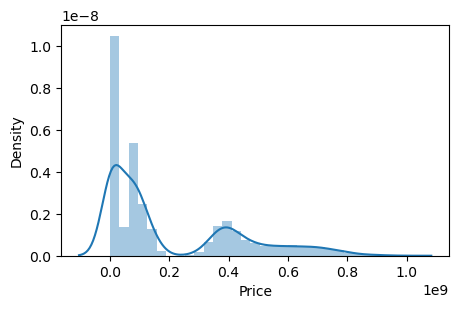

In [646]:
#normality of target variable

fig = plt.figure(figsize=(5,3)) 
sns.distplot(data['Price'])

print(f'Skewness: {data["Price"].skew()}')

Target variable is very right skewed. Let's transform the target variable. We will apply log, square root, log1p, and Box-Cox transformations and choose the best one.

Skewness of log-transformed data -1.0348786789613582.
Skewness of log1p-transformed data -1.034877973334125.
Skewness of sqrt-transformed data 0.41382030350904603.
Skewness of box-cox transformed data -0.24820909322096213.


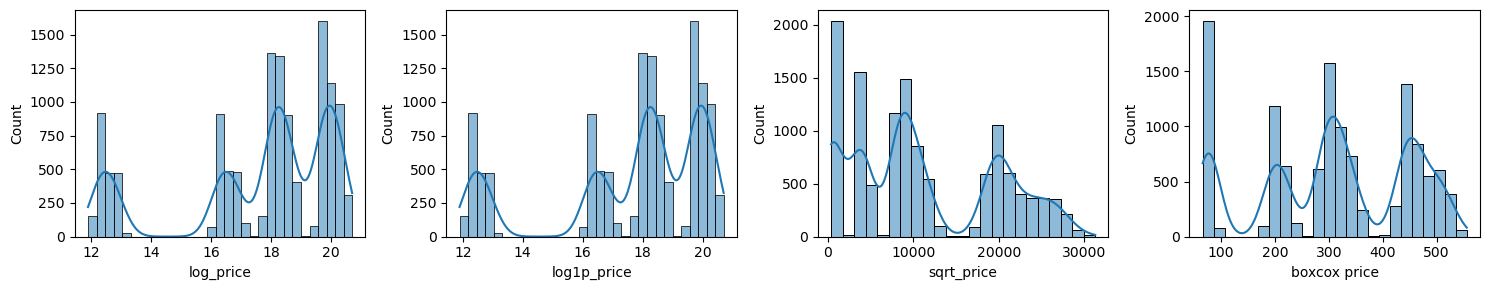

In [647]:
from scipy.stats import boxcox

fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows = 1, ncols = 4, figsize = (15,3))

target_log = np.log(data['Price'])
print(f"Skewness of log-transformed data {target_log.skew()}.")
sns.histplot(target_log, ax = ax1, kde = True)
ax1.set_xlabel('log_price')

target_log1p = np.log1p(data['Price'])
print(f"Skewness of log1p-transformed data {target_log1p.skew()}.")
sns.histplot(target_log1p, ax = ax2, kde = True)
ax2.set_xlabel('log1p_price')

target_sqrt = np.sqrt(data['Price'])
print(f"Skewness of sqrt-transformed data {target_sqrt.skew()}.")
sns.histplot(target_sqrt, ax = ax3, kde = True)
ax3.set_xlabel('sqrt_price')

target_bc,_  = boxcox(data['Price'])
target_bc = pd.Series(target_bc)
print(f"Skewness of box-cox transformed data {target_bc.skew()}.")
sns.histplot(target_bc, ax = ax4, kde = True)
ax4.set_xlabel('boxcox price')

plt.tight_layout()


Let's take the square root of the target price variable for further analysis. It has skewness within an acceptable range, but its density still doesn't appear very close to a classic normal distribution.

In [648]:
data2 = data.copy()
data2['Price'] = target_sqrt

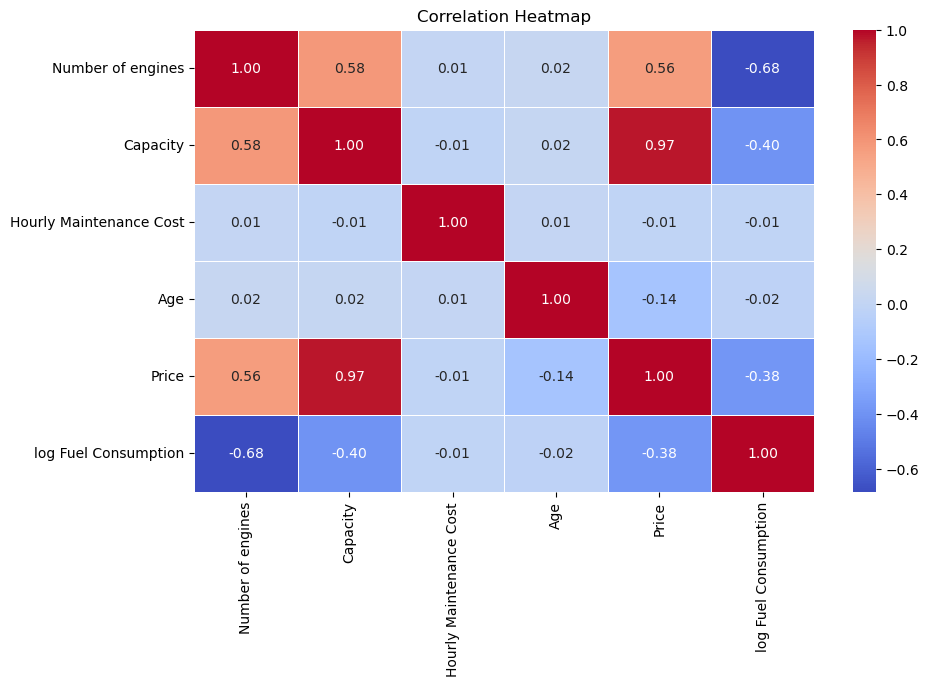

In [651]:
#multicolinearity

# correlation matrix
corr_matrix = data2.select_dtypes('number').corr()

# heatmap
plt.figure(figsize=(10, 6))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()


#### ONE HOT ENCODING

In [653]:
from sklearn.preprocessing import OneHotEncoder

def onehotencoding(data):
    categorical_cols = data2.select_dtypes('object').columns
    
    data_ohc = data2.copy()
    
    ohc = OneHotEncoder()
    
    for col in categorical_cols:
    
        #one hot encode the data .. this returnes sparse array
        new_data = ohc.fit_transform(data_ohc[[col]])
    
        #drop original column from dataframe 
        data_ohc = data_ohc.drop(col, axis = 1)
        
        #Get names of all unique values in column so we can identify later
        cats = ohc.categories_
        
        #Create the new column names for each ONE column by value
        new_cols = ['_'.join([col,cat]) for cat in cats[0]]
        
        #Create the new dataframe
        new_df = pd.DataFrame(new_data.toarray(), columns = new_cols)
        
        #Append the new data to the dataframe
        data_ohc = pd.concat([data_ohc,new_df], axis = 1)
    return data_ohc

In [662]:
data_encoded = onehotencoding(data2)

In [663]:
data_encoded

,Number of engines,Capacity,Hourly Maintenance Cost,Age,Price,log Fuel Consumption,Model_Airbus A320,Model_Airbus A350,Model_Boeing 737,Model_Boeing 777,Model_Bombardier CRJ200,Model_Cessna 172,Engine type_Piston,Engine type_Turbofan,Sales Region_Africa,Sales Region_Asia,Sales Region_Australia,Sales Region_Europe,Sales Region_North America,Sales Region_South America
0,2,50,2185.430000,36,3585.677608,2.664447,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,2,50,1202.080000,26,3730.155298,1.393766,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2,2,180,761.380000,35,9525.528639,2.584752,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3,2,162,592.630000,0,11690.153522,2.681706,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4,1,4,4245.990000,38,451.440029,2.917230,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12372,2,396,3054.290000,29,19743.532368,2.498152,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
12373,2,50,3107.670000,18,3992.352198,2.111425,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12374,2,162,3972.160000,8,9935.287575,1.935860,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
12375,1,4,999.840000,10,629.698872,2.658860,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### MODELS

<span style="color:#D84B00">LINEAR REGRESSION</span>

In [664]:
def plot_dist_scatter_bar(model, X_test, y_test):
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

    sns.distplot(y_test, hist=False, ax = ax[0], label = 'test values')
    sns.distplot(model.predict(X_test), hist = False, ax =ax[0], label = 'predicted_values')
    ax[0].legend(fontsize = 8)

    ax[1].scatter(y_test, model.predict(X_test), marker = '.')
    ax[1].set_xlabel('test_values')
    ax[1].set_ylabel('predicted_values')
    ax[1].axline((0,0), slope = 1, color = 'red')

    plt.tight_layout()
    plt.show()


In [665]:
pd.options.display.float_format = '{:.6f}'.format  # Global setting

In [666]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data_encoded.drop(columns = ['Price'])
y = data_encoded.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

metrics = pd.DataFrame()
metrics.index = ['R2', 'MSE']



In [667]:
#simple linear regression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

metrics['Linear Regression'] = pd.Series([r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)], index = ['R2', 'MSE'])

metrics

,Linear Regression
R2,0.973125
MSE,1923464.462236


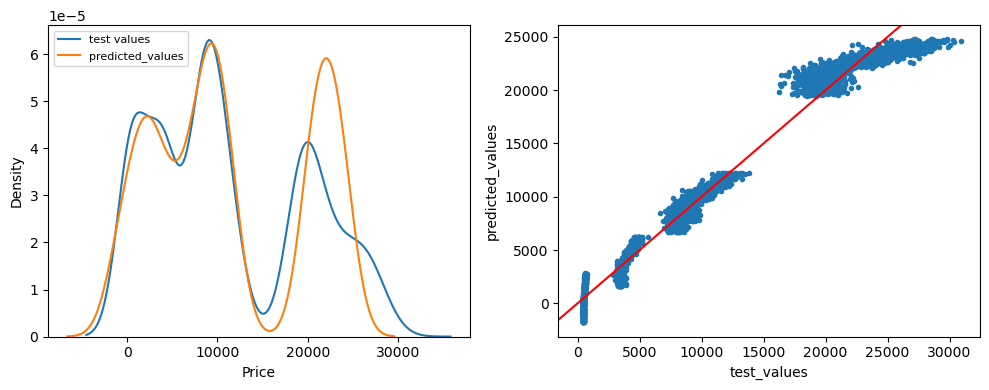

In [668]:
#plotted predicted values vs. test values

plot_dist_scatter_bar(lr, X_test, y_test)

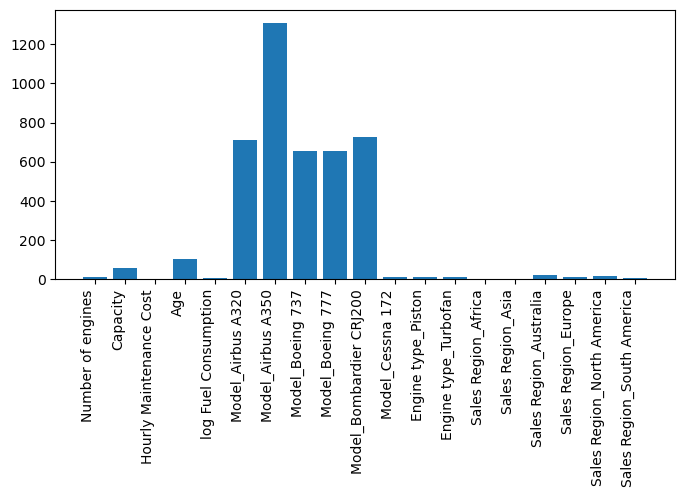

In [673]:
plt.figure(figsize =(8,3.5))
plt.bar( X_test.columns, abs(lr.coef_))
plt.xticks(range(len(X_test.columns)))
plt.xticks(X_test.columns, rotation=90, ha="right")  # Fix x-ticks

plt.show()

In [678]:
[(x, y) for x, y in zip(X_test.columns, lr.coef_)]


[('Number of engines', 9.939341885020614),
 ('Capacity', 57.608677361851065),
 ('Hourly Maintenance Cost', 0.00305406465318931),
 ('Age', -105.52188375221033),
 ('log Fuel Consumption', -8.536359319259393),
 ('Model_Airbus A320', -713.236313545007),
 ('Model_Airbus A350', 1308.6889627319476),
 ('Model_Boeing 737', -655.2852444934332),
 ('Model_Boeing 777', -655.7619124994724),
 ('Model_Bombardier CRJ200', 725.5338496909861),
 ('Model_Cessna 172', -9.939341885020395),
 ('Engine type_Piston', -9.939341885020395),
 ('Engine type_Turbofan', 9.939341885020395),
 ('Sales Region_Africa', -1.844991660450432),
 ('Sales Region_Asia', 0.4410536711233018),
 ('Sales Region_Australia', 24.02619489826763),
 ('Sales Region_Europe', -13.722105636249355),
 ('Sales Region_North America', -15.629005815314256),
 ('Sales Region_South America', 6.728854542623747)]

Although R² (around 97%) suggests a good fit on the training data, it is important to perform **<span style="color:red">cross validation</span>** to check the model's stability and its ability to generalize to unseen data.

In [685]:
# kfold cross validation

from sklearn.model_selection import KFold

kf = KFold(shuffle = True, random_state= 42, n_splits = 3)

lin_reg = LinearRegression()
scores =[]

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], X.iloc[test_index, :], y[train_index], y[test_index])

    lin_reg.fit(X_train, y_train)
    score = r2_score(lin_reg.predict(X_test), y_test)
    scores.append(score)

print(f'R2 value for each fold: {scores}')
print(f'Average R2: {np.mean(scores)}')

R2 value for each fold: [0.9724777791286223, 0.9727802088168926, 0.974767593453681]
Average R2: 0.9733418604663987


Cross-validation also yields a high R², which suggests that the model is likely generalizing well and not just overfitting to the training data. This is a good indication that the model is robust and performs consistently across different subsets of the data.

<span style="color:#D84B00">LINEAR REGRESSION with STANDARDIZATION and POLYNOMIAL FEATURES</span>

In [686]:
#standardization, polynomial features and linear regression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pipe = Pipeline([('std_scaler', StandardScaler()),('poly_feat', PolynomialFeatures(degree=2)), ('lin_reg', LinearRegression()) ])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

metrics['Linear Reg + pf + ss'] = pd.Series([r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)], index = ['R2', 'MSE'])

metrics


,Linear Regression,Linear Reg + pf + ss
R2,0.973125,0.990893
MSE,1923464.462236,655883.825535


In [687]:
#in order to correctly plot our results, we first have to apply scaler and polynomial features to our test set

X_test_ss = pipe.named_steps['std_scaler'].transform(X_test)
X_test_ss_pf = pipe.named_steps['poly_feat'].transform(X_test_ss)

# Get the feature names after transformation
feature_names = pipe.named_steps['poly_feat'].get_feature_names_out(input_features=X_test.columns)


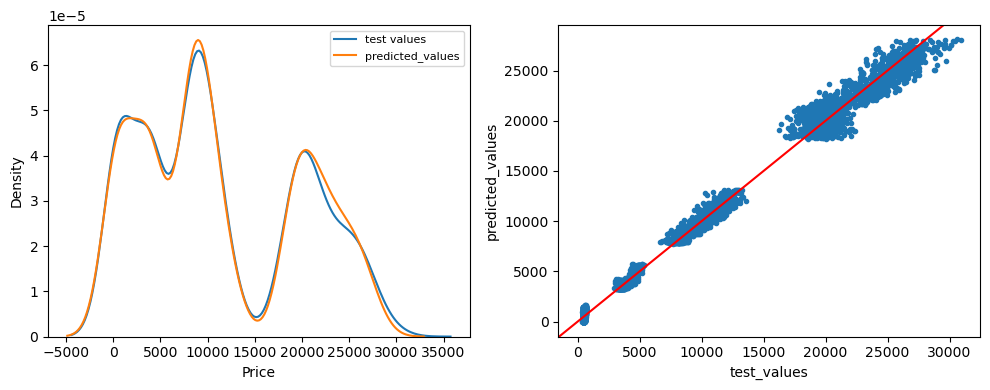

In [688]:
plot_dist_scatter_bar(pipe.named_steps['lin_reg'], X_test_ss_pf, y_test)

After including polynomial terms, the results are even better than before, as seen from the comparison of the density of predictions and actual values of y, as well as the even higher R² (99%).

Let's see if R2 is still that high even after **<span style="color:red">cross validation</span>**.

In [689]:
# kfold cross validation

from sklearn.model_selection import KFold

kf = KFold(shuffle = True, random_state= 42, n_splits = 3)

pipe_cv = Pipeline([('std_scaler', StandardScaler()),('poly_feat', PolynomialFeatures(degree=2)), ('lin_reg', LinearRegression()) ])


scores =[]

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], X.iloc[test_index, :], y[train_index], y[test_index])

    pipe_cv.fit(X_train, y_train)
    score = r2_score(pipe_cv.predict(X_test), y_test)
    scores.append(score)

print(f'R2 value for each fold: {scores}')
print(f'Average R2: {np.mean(scores)}')

R2 value for each fold: [0.9899410634538466, 0.9901402518823432, 0.990767908435422]
Average R2: 0.9902830745905372


<span style="color:#D84B00">LASSO REGRESSION</span>

In [690]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

pf = PolynomialFeatures(degree=2)
scores = []

alphas = np.geomspace(0.001, 10, 5)
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    estimator = Pipeline([
        ("scaler", StandardScaler()),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])
    estimator.fit(X_train, y_train)
    scores.append(estimator.score(X_test, y_test))
scores

[0.9908932430988091,
 0.990893256074008,
 0.9908933894107163,
 0.9908965356249495,
 0.9909296587254963]

In [692]:
pd.DataFrame({'alphas':alphas, 'R2':scores}).sort_values(by = 'R2', ascending=False)

,alphas,R2
4,10.000000,0.990930
3,1.000000,0.990897
2,0.100000,0.990893
1,0.010000,0.990893
0,0.001000,0.990893


Best $R^2$ is achieved for alpha = 10

In [697]:
best_estimator = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=10, max_iter=10000))])

best_estimator.fit(X_train, y_train)
metrics['Lasso'] =  pd.Series([best_estimator.score(X_test, y_test), mean_squared_error(y_test, best_estimator.predict(X_test))], index = ['R2', 'MSE'])


In [694]:
#in order to correctly plot our results, we first have to apply scaler and polynomial features to our test set

X_lasso_ss = best_estimator.named_steps['scaler'].transform(X_test)
X_lasso_ss_pf = best_estimator.named_steps['make_higher_degree'].transform(X_lasso_ss)

# Get the feature names after transformation
feature_names = best_estimator.named_steps['make_higher_degree'].get_feature_names_out(input_features=X_test.columns)


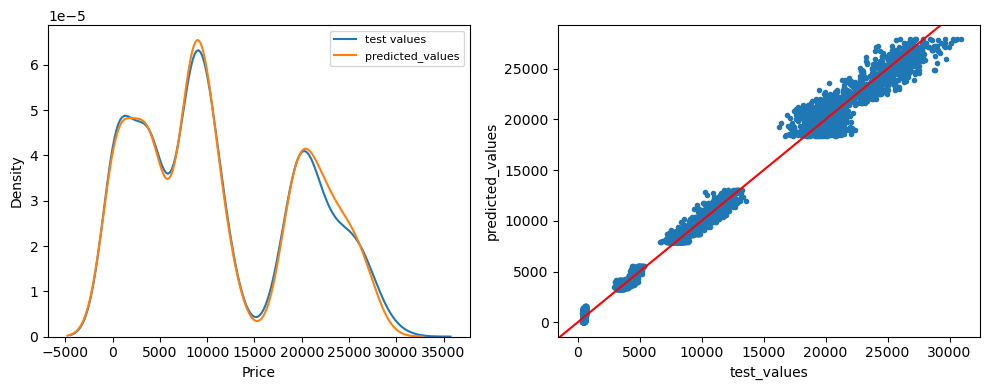

In [695]:
plot_dist_scatter_bar(best_estimator.named_steps['lasso_regression'], X_lasso_ss_pf, y_test)

In [696]:
metrics

,Linear Regression,Linear Reg + pf + ss,Lasso
R2,0.973125,0.990893,0.990930
MSE,1923464.462236,655883.825535,653260.909727


Lasso regression produces even slightly higher $R^2$ and smaller MSE than last model.

For  **<span style="color:red">cross validation</span>**, we will apply LassoCV.

In [706]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([0.001, 0.01, 0.1, 1, 10, 100])

estimator = Pipeline([
            ('ss', StandardScaler()), 
            ('pf', PolynomialFeatures(degree=2)),('lassocv', LassoCV(alphas=alphas2, max_iter=100000,cv=4))])
estimator.fit(X_train, y_train)

print(f'Best alpha: {estimator.named_steps["lassocv"].alpha_}, R2 score: {r2_score(y_test, estimator.predict(X_test))}, MSE: {mean_squared_error(y_test,estimator.predict(X_test))}')


Best alpha: 10.0, R2 score: 0.9909296587254963, MSE: 653260.9097268092


Again, $R^2$ is very high and MSE is low.

<span style="color:#D84B00">RIDGE REGRESSION</span>

In [707]:
pf = PolynomialFeatures(degree=2)
scores = []

alphas = np.geomspace(0.001, 10, 5)
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)
    estimator = Pipeline([
        ("scaler", StandardScaler()),
        ("make_higher_degree", pf),
        ("ridge_regression", ridge)])
    estimator.fit(X_train, y_train)
    scores.append(estimator.score(X_test, y_test))
scores

[0.990893240367606,
 0.9908932410826893,
 0.9908932482274314,
 0.9908933190659451,
 0.99089396669123]

In [708]:
pd.DataFrame({'alphas':alphas, 'R2':scores}).sort_values(by = 'R2', ascending=False)

,alphas,R2
4,10.000000,0.990894
3,1.000000,0.990893
2,0.100000,0.990893
1,0.010000,0.990893
0,0.001000,0.990893


In [709]:
best_estimator2 = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("ridge_regression", Ridge(alpha=10, max_iter=10000))])

best_estimator2.fit(X_train, y_train)
metrics['Ridge'] =  pd.Series([best_estimator2.score(X_test, y_test), mean_squared_error(y_test, best_estimator2.predict(X_test))], index = ['R2', 'MSE'])
metrics

,Linear Regression,Linear Reg + pf + ss,Lasso,Ridge
R2,0.973125,0.990893,0.990930,0.990894
MSE,1923464.462236,655883.825535,653260.909727,655831.508789


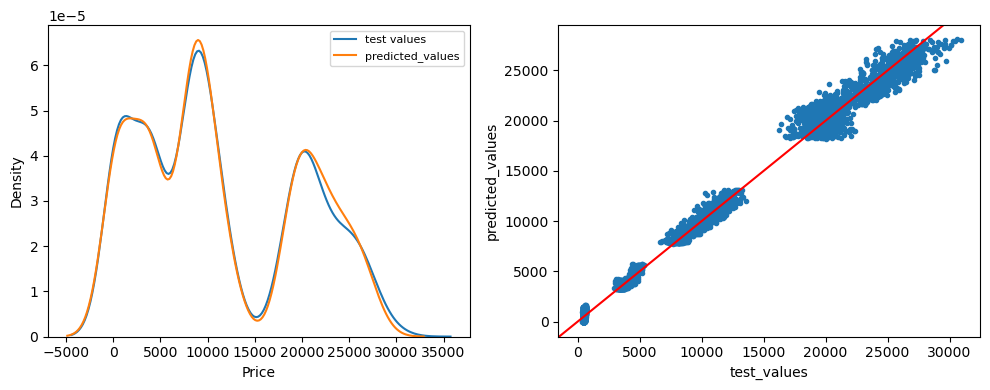

In [710]:
X_ridge_ss = best_estimator2.named_steps['scaler'].transform(X_test)
X_ridge_ss_pf = best_estimator2.named_steps['make_higher_degree'].transform(X_ridge_ss)

plot_dist_scatter_bar(best_estimator2.named_steps['ridge_regression'], X_ridge_ss_pf, y_test)

Ridge regression also produces high $R^2$ but slightly smaller than Lasso.

For  **<span style="color:red">cross validation</span>**, we will apply RidgeCV.

In [711]:
from sklearn.linear_model import RidgeCV

alphas2 = np.array([0.001, 0.01, 0.1, 1, 10, 100])

estimator3 = Pipeline([
            ('ss', StandardScaler()), 
            ('pf', PolynomialFeatures(degree=2)),('ridgecv', RidgeCV(alphas=alphas2,cv=3))])
estimator3.fit(X_train, y_train)

print(f'Best alpha: {estimator3.named_steps["ridgecv"].alpha_}, R2 score: {r2_score(y_test, estimator3.predict(X_test))}, MSE: {mean_squared_error(y_test,estimator3.predict(X_test))}')


Best alpha: 10.0, R2 score: 0.99089396669123, MSE: 655831.5087890934


<span style="color:#D84B00">ELASTIC NET</span>

In [712]:
alphas = np.geomspace(0.001, 10, 5)
ratios = np.arange(0, 1.1, 0.1)

results = []

for alpha in alphas:
    for ratio in ratios:
        estimator = Pipeline([
            ('ss', StandardScaler()), 
            ('pf', PolynomialFeatures(degree=2)),
            ('elastic_net', ElasticNet(alpha=alpha, l1_ratio=ratio, max_iter=10000))
        ])
        estimator.fit(X_train, y_train)
        
        results.append({
            'alpha': alpha, 
            'ratio': ratio, 
            'R2': estimator.score(X_test, y_test)
        })

scores = pd.DataFrame(results)


In [713]:
filt =scores['R2'] == max(scores['R2'])
scores.loc[filt]

,alpha,ratio,R2
54,10.000000,1.000000,0.990930


The Elastic Net model indicates that the best ratio is 1, which corresponds to Lasso regression.

In [714]:
best_estimatorEN = Pipeline([
            ('ss', StandardScaler()), 
            ('pf', PolynomialFeatures(degree=2)),
            ('elastic_net', ElasticNet(alpha=10, l1_ratio=1, max_iter=10000))])
    
best_estimatorEN.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('pf', PolynomialFeatures()),
                ('elastic_net',
                 ElasticNet(alpha=10, l1_ratio=1, max_iter=10000))])

In [715]:
metrics['Elastic Net'] =  pd.Series([r2_score(y_test,best_estimatorEN.predict(X_test)), mean_squared_error(y_test,best_estimatorEN.predict(X_test))], index = ['R2', 'MSE'])
metrics

,Linear Regression,Linear Reg + pf + ss,Lasso,Ridge,Elastic Net
R2,0.973125,0.990893,0.990930,0.990894,0.990930
MSE,1923464.462236,655883.825535,653260.909727,655831.508789,653260.909727


As expected, results for Elastic Net are the same as results for Lasso Regression.

We will also perform **<span style="color:red">cross validation</span>** in this case using ElasticNetCV.

In [718]:
from sklearn.linear_model import ElasticNetCV

alphas2 = np.array([0.001, 0.01, 0.1, 1, 10, 100])
ratios = np.arange(0, 1.1, 0.1)

estimator4 = Pipeline([
            ('ss', StandardScaler()), 
            ('pf', PolynomialFeatures(degree=2)),('elasticnetcv', ElasticNetCV(alphas=alphas2, l1_ratio = ratios, cv=3))])
estimator4.fit(X_train, y_train)


print(f'Best alpha: {estimator4.named_steps["elasticnetcv"].alpha_}, R2 score: {r2_score(y_test, estimator4.predict(X_test))}, MSE: {mean_squared_error(y_test,estimator4.predict(X_test))}')



Best alpha: 10.0, R2 score: 0.9909296587254963, MSE: 653260.9097268092


#### GRID SEARCH 

Finally, we will perform a Grid Search for Ridge and Lasso regression, including polynomial terms up to the 3rd degree.

In [726]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_predict
# Same estimator as before
estimator = Pipeline([("polynomial_features", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(0.0001, 10, 6)
}
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
grid = GridSearchCV(estimator, params, cv=kf)

In [727]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])})

In [728]:
grid.best_score_, grid.best_params_, 

(0.9917887224821058,
 {'polynomial_features__degree': 3, 'ridge_regression__alpha': 10.0})

In [729]:
estimator5 = Pipeline([("polynomial_features", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("lasso_regression", Lasso())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'lasso_regression__alpha': np.geomspace(0.001, 100, 6)
}
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
grid5 = GridSearchCV(estimator5, params, cv=kf)

In [730]:
grid5.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('lasso_regression', Lasso())]),
             param_grid={'lasso_regression__alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'polynomial_features__degree': [1, 2, 3]})

In [731]:
grid5.best_score_, grid5.best_params_

(0.9919019161514112,
 {'lasso_regression__alpha': 1.0, 'polynomial_features__degree': 3})

Best model is Lasso regression with alpha = 1 and polynomial features of third degree.